<a href="https://colab.research.google.com/github/pablex72/CNN-deep-learning/blob/main/SOS_EOS_Determination_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
ndvi_data = pd.read_csv('/content/drive/MyDrive/research-the/interpolated_data_filled_splines.csv')

In [ ]:
import numpy as np
from scipy.signal import find_peaks

# Assuming your NDVI data is stored in a DataFrame called 'ndvi_data'
# Convert the 'Date' column to datetime format if it's not already

# Extract the NDVI values as a NumPy array
ndvi_values = ndvi_data['NDVI'].values

# Find local maxima
maxima_indices, _ = find_peaks(ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Find local minima
minima_indices, _ = find_peaks(-ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Create a DataFrame to store critical points
critical_points = pd.DataFrame({'Date': ndvi_data['Date'][maxima_indices].values.tolist() +
                                               ndvi_data['Date'][minima_indices].values.tolist(),
                                'NDVI': ndvi_values[maxima_indices].tolist() +
                                        ndvi_values[minima_indices].tolist(),
                                'Type': ['Maxima'] * len(maxima_indices) + ['Minima'] * len(minima_indices)})

# Sort the critical points by date
critical_points = critical_points.sort_values(by='Date')

# Display the critical points
print(critical_points)


          Date      NDVI    Type
3    1/15/2021  0.798868  Maxima
11  10/12/2020  0.079070  Minima
13   10/7/2021  0.194923  Minima
9    10/8/2019  0.121145  Minima
7   11/11/2022  0.169681  Maxima
5   12/31/2021  0.788899  Maxima
1    2/15/2020  0.678428  Maxima
8    3/22/2019  0.281381  Minima
14   3/31/2022  0.137197  Minima
0    5/26/2019  0.454710  Maxima
6    6/29/2022  0.488376  Maxima
10    6/4/2020  0.242694  Minima
12    6/9/2021  0.161590  Minima
4    8/13/2021  0.393630  Maxima
2     8/3/2020  0.491584  Maxima
15   9/17/2022  0.028411  Minima


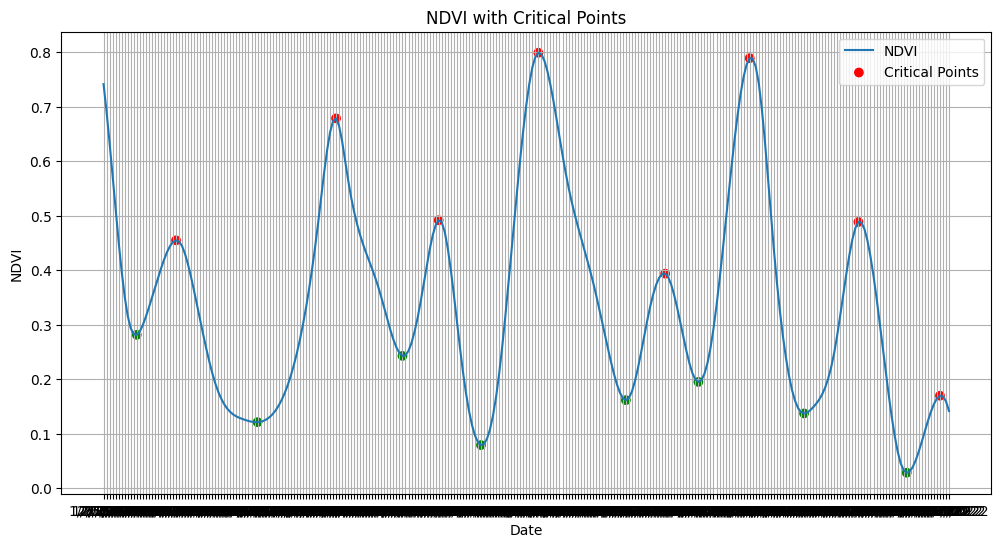

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Assuming your NDVI data is stored in a DataFrame called 'ndvi_data'
# Convert the 'Date' column to datetime format if it's not already

# Extract the NDVI values as a NumPy array
ndvi_values = ndvi_data['NDVI'].values

# Find local maxima
maxima_indices, _ = find_peaks(ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Find local minima
minima_indices, _ = find_peaks(-ndvi_values, prominence=0.02)  # Adjust prominence as needed

# Create a DataFrame to store critical points
critical_points = pd.DataFrame({'Date': ndvi_data['Date'][maxima_indices].values.tolist() +
                                               ndvi_data['Date'][minima_indices].values.tolist(),
                                'NDVI': ndvi_values[maxima_indices].tolist() +
                                        ndvi_values[minima_indices].tolist(),
                                'Type': ['Maxima'] * len(maxima_indices) + ['Minima'] * len(minima_indices)})

# Sort the critical points by date
critical_points = critical_points.sort_values(by='Date')

# Plot the critical points
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['Date'], ndvi_values, label='NDVI')
plt.scatter(critical_points['Date'], critical_points['NDVI'], c=critical_points['Type'].map({'Maxima': 'r', 'Minima': 'g'}), label='Critical Points')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI with Critical Points')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np

# Assuming 'critical_points' DataFrame contains the minima and their corresponding NDVI values

# Initialize variables to store the areas
minima_areas = []

# Iterate through each pair of adjacent minima
for i in range(1, len(critical_points)):
    if critical_points.iloc[i]['Type'] == 'Minima':
        # Get the indices of the data points between the minima
        start_idx = critical_points.index[i-1]
        end_idx = critical_points.index[i]

        # Extract the NDVI values between the minima
        ndvi_values_between_minima = ndvi_values[start_idx:end_idx+1]

        # Calculate the area under the curve using the trapezoidal rule
        area = np.trapz(ndvi_values_between_minima)

        # Add the area to the list of minima areas
        minima_areas.append(area)

# Create a DataFrame to store the minima areas
minima_areas_df = pd.DataFrame({'Date': critical_points[critical_points['Type'] == 'Minima']['Date'].values.tolist(),
                                'Minima Area': minima_areas})

# Display the minima areas
print(minima_areas_df)


         Date  Minima Area
0  10/12/2020     3.031660
1   10/7/2021     0.577943
2   10/8/2019     0.000000
3   3/22/2019     3.421514
4   3/31/2022     1.759815
5    6/4/2020     1.301420
6    6/9/2021     0.566526
7   9/17/2022     4.842198


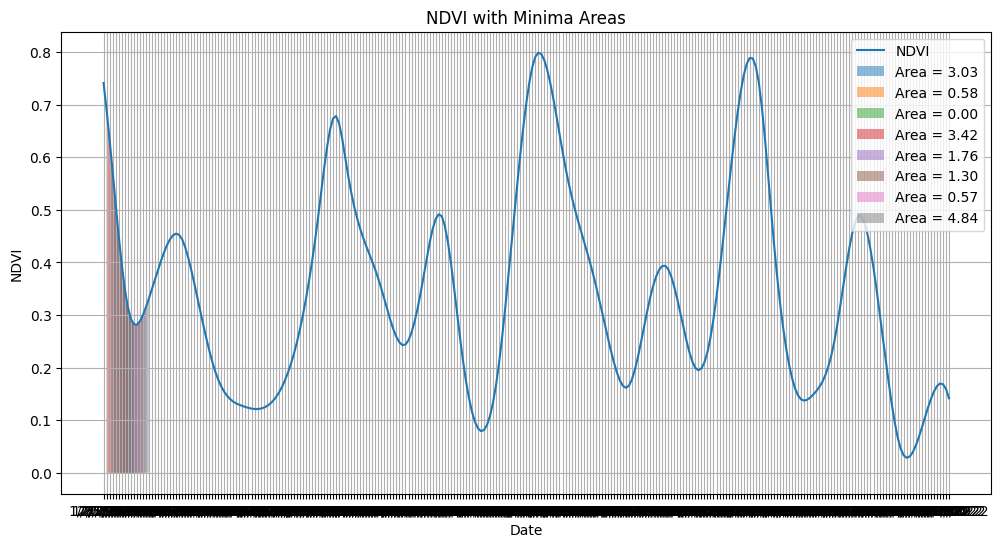

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'critical_points' DataFrame contains the minima and their corresponding NDVI values
# Assuming 'minima_areas_df' DataFrame contains the calculated areas

# Create a plot of your NDVI data
plt.figure(figsize=(12, 6))
plt.plot(ndvi_data['Date'], ndvi_values, label='NDVI')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.title('NDVI with Minima Areas')

# Iterate through each pair of adjacent minima
for i in range(1, len(critical_points)):
    if critical_points.iloc[i]['Type'] == 'Minima':
        # Get the indices of the data points between the minima
        start_idx = critical_points.index[i-1]
        end_idx = critical_points.index[i]

        # Extract the NDVI values between the minima
        ndvi_values_between_minima = ndvi_values[start_idx:end_idx+1]

        # Calculate the area under the curve using the trapezoidal rule
        area = np.trapz(ndvi_values_between_minima)

        # Highlight the area between minima
        plt.fill_between(ndvi_data['Date'][start_idx:end_idx+1], ndvi_values_between_minima, alpha=0.5, label=f'Area = {area:.2f}')

# Display the legend
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Sort the minima areas in ascending order
minima_areas_df = minima_areas_df.sort_values(by='Minima Area')

# Calculate the cumulative sum of minima areas
minima_areas_df['Cumulative Sum'] = minima_areas_df['Minima Area'].cumsum()

# Calculate the total area under all minima curves
total_area = minima_areas_df['Minima Area'].sum()

# Find the SOS (Start of Season) and EOS (End of Season)
sos_threshold = 0.05 * total_area
eos_threshold = 0.95 * total_area

# Find the indices corresponding to SOS and EOS
sos_index = minima_areas_df[minima_areas_df['Cumulative Sum'] >= sos_threshold].index[0]
eos_index = minima_areas_df[minima_areas_df['Cumulative Sum'] >= eos_threshold].index[0]

# Get the dates corresponding to SOS and EOS
sos_date = minima_areas_df.iloc[sos_index]['Date']
eos_date = minima_areas_df.iloc[eos_index]['Date']

# Display SOS and EOS
print(f'Start of Season (SOS): {sos_date}')
print(f'End of Season (EOS): {eos_date}')


Start of Season (SOS): 6/9/2021
End of Season (EOS): 9/17/2022


TypeError: ignored

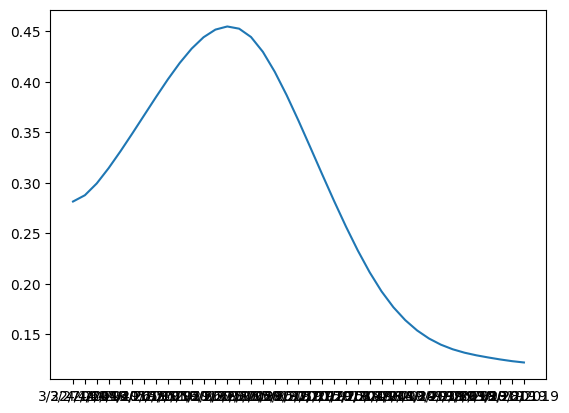

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points as arrays (same as in the previous example)
dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
         "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
         "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
         "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
         "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
          0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
          0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
          0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
          0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]


# Calculate the area using the trapezoidal rule
area = np.trapz(values, dx=1)

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.plot(dates, values, label="Curve")

# Fill the area under the curve
ax.fill_between(dates, values, 0, where=(values >= 0), alpha=0.3, color='green', label="Area under the curve")

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Area Under the Curve")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points as arrays (same as in the previous example)
dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
         "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
         "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
         "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
         "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
          0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
          0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
          0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
          0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]

# Calculate the total area under the curve
total_area = np.trapz(values, dx=1)

# Calculate the target areas (5% and 95% of the total area)
target_area_5_percent = 0.05 * total_area
target_area_95_percent = 0.95 * total_area

# Initialize variables to keep track of accumulated area
accumulated_area = 0
beginning_point = None
ending_point = None

# Iterate through the data points to find the desired points
for i in range(len(dates)):
    accumulated_area += values[i]
    if accumulated_area >= target_area_5_percent and beginning_point is None:
        beginning_point = (dates[i], values[i])
    if accumulated_area >= target_area_95_percent:
        ending_point = (dates[i], values[i])
        break

print(f"Beginning Point (5% of area): {beginning_point}")
print(f"Ending Point (95% of area): {ending_point}")


Beginning Point (5% of area): ('3/27/2019', 0.287602726)
Ending Point (95% of area): ('9/3/2019', 0.131669344)


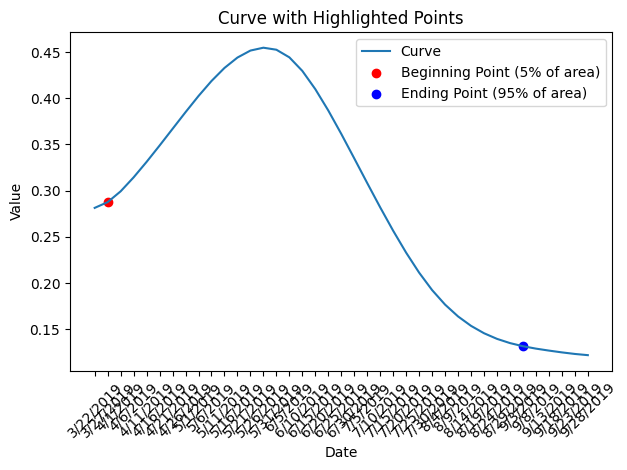

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points as arrays (same as in the previous example)
dates = ["3/22/2019", "3/27/2019", "4/1/2019", "4/6/2019", "4/11/2019", "4/16/2019", "4/21/2019", "4/26/2019",
         "5/1/2019", "5/6/2019", "5/11/2019", "5/16/2019", "5/21/2019", "5/26/2019", "5/31/2019", "6/5/2019",
         "6/10/2019", "6/15/2019", "6/20/2019", "6/25/2019", "6/30/2019", "7/5/2019", "7/10/2019", "7/15/2019",
         "7/20/2019", "7/25/2019", "7/30/2019", "8/4/2019", "8/9/2019", "8/14/2019", "8/19/2019", "8/24/2019",
         "8/29/2019", "9/3/2019", "9/8/2019", "9/13/2019", "9/18/2019", "9/23/2019", "9/28/2019"]
values = [0.281380591, 0.287602726, 0.299299509, 0.31441601, 0.331162388, 0.348809159, 0.366891929, 0.384946305,
          0.40245252, 0.418669328, 0.43280011, 0.44404825, 0.451617129, 0.45471013, 0.452530635, 0.444282026,
          0.429602879, 0.409872548, 0.386774254, 0.36146592, 0.334974142, 0.308250355, 0.281945353, 0.256634769,
          0.232894234, 0.211299383, 0.192425846, 0.17669418, 0.163904626, 0.153702351, 0.145732521, 0.139640299,
          0.135070852, 0.131669344, 0.129080942, 0.12695081, 0.125007236, 0.123310994, 0.122005983]

# Calculate the total area under the curve
total_area = np.trapz(values, dx=1)

# Calculate the target areas (5% and 95% of the total area)
target_area_5_percent = 0.05 * total_area
target_area_95_percent = 0.95 * total_area

# Initialize variables to keep track of accumulated area
accumulated_area = 0
beginning_point = None
ending_point = None

# Iterate through the data points to find the desired points
for i in range(len(dates)):
    accumulated_area += values[i]
    if accumulated_area >= target_area_5_percent and beginning_point is None:
        beginning_point = (dates[i], values[i])
    if accumulated_area >= target_area_95_percent:
        ending_point = (dates[i], values[i])
        break

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the curve
ax.plot(dates, values, label="Curve")

# Highlight the beginning and ending points
ax.scatter(beginning_point[0], beginning_point[1], color='red', label="Beginning Point (5% of area)")
ax.scatter(ending_point[0], ending_point[1], color='blue', label="Ending Point (95% of area)")

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.set_title("Curve with Highlighted Points")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
